In [44]:
# Useful starting lines
%matplotlib inline
import datetime
from costs import compute_loss
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
# standardize the data
tX_std = standardize(tX)


In [74]:
print(tX_std)

[[ 0.46141372  0.06833197  0.40768027 ...  1.5668      1.55858439
   0.4125105 ]
 [ 0.51670419  0.55250482  0.54013641 ... -0.63936657 -0.63936694
  -0.27381996]
 [-2.33785898  3.19515553  1.09655998 ... -0.63936657 -0.63936694
  -0.29396985]
 ...
 [ 0.38016991  0.31931645 -0.13086367 ... -0.63936657 -0.63936694
  -0.31701723]
 [ 0.35431502 -0.84532397 -0.30297338 ... -0.63936657 -0.63936694
  -0.74543941]
 [-2.33785898  0.66533608 -0.25352276 ... -0.63936657 -0.63936694
  -0.74543941]]


# least squares GD

In [34]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    return (-1/len(y))*tx.T@(y-tx@w)
    # ***************************************************


def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """least square gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # compute gradient computes the gradient
        gradient = compute_gradient(y,tx,w)
        # compute loss. here MSE is used
        loss = compute_loss(y,tx,w)
        # ***************************************************
        # TODO: update w by gradient
        w = w-gamma*gradient
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

## test gd

In [ ]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = least_squares_GD(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(gradient_losses)

# least square SGD

In [149]:

def compute_stoch_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    e = y-tx@w
    return -1/len(y)*tx.T@e
    # ***************************************************


def least_squares_SGD(y, tx, initial_w, batch_size, max_iters, gamma):
    """Least square stochastic gradient descent algorithm."""
    # ***************************************************
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute random batch
        a = batch_iter(y, tx, batch_size, num_batches=1, shuffle=True)
        a = list(a)
        tx2, y2 = a[0][1], a[0][0]
        
        # compute gradient & loss
        grad = compute_stoch_gradient(y2,tx2,w)
        loss= compute_loss(y2, tx2, w)
        print(grad)
        # update gradient
        w = w-gamma*grad
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("stoch Gradient Descent({bi}/{ti}): loss={l}".format(
              #bi=n_iter, ti=max_iters - 1, l=loss))

    return np.array(losses), np.array(ws)

## test sgd

In [ ]:
from proj1_helpers import batch_iter
# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.02
batch_size = 50000

# Initialization
w_initial = np.zeros(30)
print(w_initial)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = least_squares_SGD(
    y, tX_std, w_initial,batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

plt.plot(sgd_losses)

# least square
computed by solving for w:  X<sup>T</sup>X * w = X<sup>T</sup>y

In [47]:
def least_square(y, tx):
    w = np.linalg.solve(tx.T@tx,tx.T@y)
    return w, compute_loss(y, tx, w)


In [48]:
wls, loss = least_square(y, tX_std)

# Ridge regression

In [49]:
def ridge_regression(y, tx, lamda):
    w = np.linalg.solve(tx.T@tx+lamda*np.eye(tx.shape[1]),tx.T@y)
    return w, compute_loss(y, tx, w)


In [156]:
wls, loss = ridge_regression(y, tX_std,0)
print(loss)

0.7779046298744507


# Logistic regression

In [51]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def update_weights(tx, y, w, gamma):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y)
    w -= gradient*gamma / len(tx)
    return w

def loss_function(tx, y, w):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    #the error when label=1
    error1 = -y*np.log(probabilities)
    #the error when label=-1
    error2 = (1-y)*np.log(1-probabilities)
    #return average of sum of costs
    return (error1-error2).mean()


# logistic regression function
def logistic_regression(y,tx, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = update_weights(tx, y, initial_w, gamma)
        loss = loss_function(tx, y, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses), np.array(ws)

#################################################################################
def decision_boundary(prob):
    return 1 if prob > 0.5 else -1

def classify(predictions):
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

# reg logistic regression

In [88]:
def update_weights_reg(tx, y, w, gamma, lambda_):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    gradient = np.dot(tx.T,  probabilities - y) + lambda_ * w
    w -= gradient*gamma / len(tx)
    return w

def reg_loss_function(tx, y, w):
    #probabilities array that the label is 1
    probabilities = sigmoid(np.dot(tx, w))
    #the error when label=1
    error1 = -y*np.log(probabilities)
    #the error when label=-1
    error2 = (1-y)*np.log(1-probabilities)
    #return average of sum of costs
    return (error1-error2).mean()+lambda_/2*np.dot(w.T,w)/ len(tx)


# regularized logistic regression function
def reg_logistic_regression(y,tx,lambda_, initial_w,  max_iter, gamma):
    losses = []
    ws = []
    for iter_n in range(max_iter):
        w = update_weights_reg(tx, y, initial_w, gamma,lambda_)
        loss = loss_function(tx, y, w)
        losses.append(loss)
        ws.append(w)
    return np.array(losses), np.array(ws)


## test logistic regression

/Users/Maxime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Gradient Descent: execution time=22.618 seconds
nan


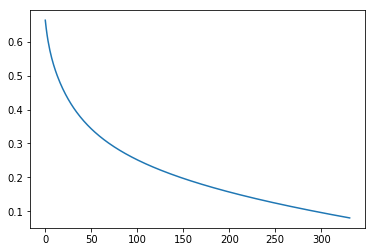

In [158]:
#Define the parameters of the algorithm.
max_iters = 400
gamma = 0.05
# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
losses, ws  = logistic_regression(y, tX_std, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(losses)
print(np.min(losses))

In [ ]:
print(ws[-4])
print(losses[-4])

# test on test set

In [76]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)



In [136]:
def standardize_test(tx, tx_test):
    centered_data = tx_test - np.mean(tx, axis=0)
    std_data = centered_data / np.std(tx, axis=0)
    return std_data
tX_test_std = standardize_test(tX, tX_test)
OUTPUT_PATH = 'outLogRegD4.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(ws[-4], tX_test_std)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

# test reg logistic regression

/Users/Maxime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Gradient Descent: execution time=14.806 seconds
best loss: [0.09039448 0.08864872 0.08691643 0.08519595 0.08348818 0.08179302
 0.08011064        nan        nan        nan]


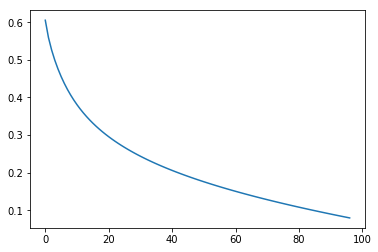

In [106]:
#Define the parameters of the algorithm.
max_iters = 100
gamma = 0.170565

lambda_ = 0.0000002

# Initialization
w_initial = np.zeros(30)

# Start gradient descent.
start_time = datetime.datetime.now()
losses, ws  = reg_logistic_regression(y, tX_std,lambda_, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
plt.plot(losses)
print(f'best loss: {losses[-10:]}')

In [109]:
print(ws[-1],ws[-4])


[ 8.28996502e-01 -1.44444025e+00 -3.25907630e-01  5.46972155e-01
  1.41982805e-02  7.53046007e-01  6.53320072e-06  6.33441168e-01
 -4.70752385e-01  1.35059302e-01 -7.27892231e-01  7.34523971e-01
  1.03069448e-02  1.26530077e+00 -1.15423181e-02 -2.02002343e-02
  2.10809065e-01 -9.32440621e-03  2.10243374e-02  1.48903061e-01
  1.60662110e-02 -1.02515852e-01 -3.46075116e-01  2.34242798e-02
  1.50906820e-03  1.52757803e-03 -2.75380982e-03  9.23098392e-03
  9.13165383e-03 -1.77342099e-01] [ 8.28996502e-01 -1.44444025e+00 -3.25907630e-01  5.46972155e-01
  1.41982805e-02  7.53046007e-01  6.53320072e-06  6.33441168e-01
 -4.70752385e-01  1.35059302e-01 -7.27892231e-01  7.34523971e-01
  1.03069448e-02  1.26530077e+00 -1.15423181e-02 -2.02002343e-02
  2.10809065e-01 -9.32440621e-03  2.10243374e-02  1.48903061e-01
  1.60662110e-02 -1.02515852e-01 -3.46075116e-01  2.34242798e-02
  1.50906820e-03  1.52757803e-03 -2.75380982e-03  9.23098392e-03
  9.13165383e-03 -1.77342099e-01]


# K-Fold cross validation

In [ ]:
def Kfold(k, tx, method):
    validation_set = tx[]

## Generate predictions and save ouput in csv format for submission:

In [21]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [50]:
tX_test_std = standardize(tX_test)  # standardize par rapport a tX_train mean and std? 

In [111]:
OUTPUT_PATH = 'out' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(ws[-1], tX_test_td)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [71]:
predict_labels(gradient_ws[-1], tX_test_std)

array([-1., -1., -1., ...,  1.,  1., -1.])